### Introduction

In the following notebook, I will be conducting a market analysis where I intend to look into the following:
- What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?
- How does the long term rental market compare to the of the tourist industry?
    - Which is more profitable? Is there evidence to suggest Airbnb should consider entering the rental housing market
    - Who are our most profitable hosts? Are people using Airbnb as a business or 

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [2]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.options.display.float_format = '{:.2f}'.format

#Set visualization preferences
plt.style.use('Solarize_Light2')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Modeling'

**Read in data**

In [3]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Read in file
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', index_col=['last_review'],
                parse_dates=['last_review'])

#Sort data
df.sort_values('last_review', inplace = True)

### Data Overview

**Preview Data**

In [4]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (126258, 47)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
last_review,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-01,1,"Wifi,Kitchen, Free street parking , Hot tub ,...",21,335,30,60,1.0,Real Bed,1.0,1.0,4,NaN,NaN,moderate,San Francisco,30.0,0.0,1,1.0,73070632,0.0,0.0,Tina,87.0,within a few hours,"email , phone , reviews , jumio , offlin...",18546459,0,1,37.710475,-122.449333,1125,6,NaN,Outer Mission,7,45.0,Condominium,0,0,1,97.0,0.57,Private room,100.0,NaN,94112.0
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",0,324,19,49,1.0,Real Bed,1.0,1.0,33,NaN,NaN,strict 14 with grace period,San Francisco,200.0,0.0,1,1.0,13832870,0.0,0.0,International,2.0,within an hour,"phone , reviews , jumio , offline governm...",18874655,0,1,37.802900,-122.419981,1125,30,NaN,Russian Hill,2,148.0,Apartment,0,0,1,100.0,0.18,Entire home/apt,1500.0,NaN,94133.0
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",29,364,59,89,1.0,Real Bed,1.0,1.0,32,NaN,NaN,strict 14 with grace period,San Francisco,200.0,0.0,1,1.0,13832870,0.0,0.0,International,96.0,within a few hours,"phone , reviews , jumio , offline governm...",18874655,0,1,37.802900,-122.419981,1125,30,NaN,Russian Hill,2,144.0,Apartment,0,0,1,100.0,0.24,Entire home/apt,1500.0,NaN,94133.0


# What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?

**Prepare Data**

In [5]:
#Get daily gross rental income
daily_gross = df.groupby('last_review')['price'].sum()

#Get daily gross rental income
daily_rentals = df.groupby('last_review')['price'].count()

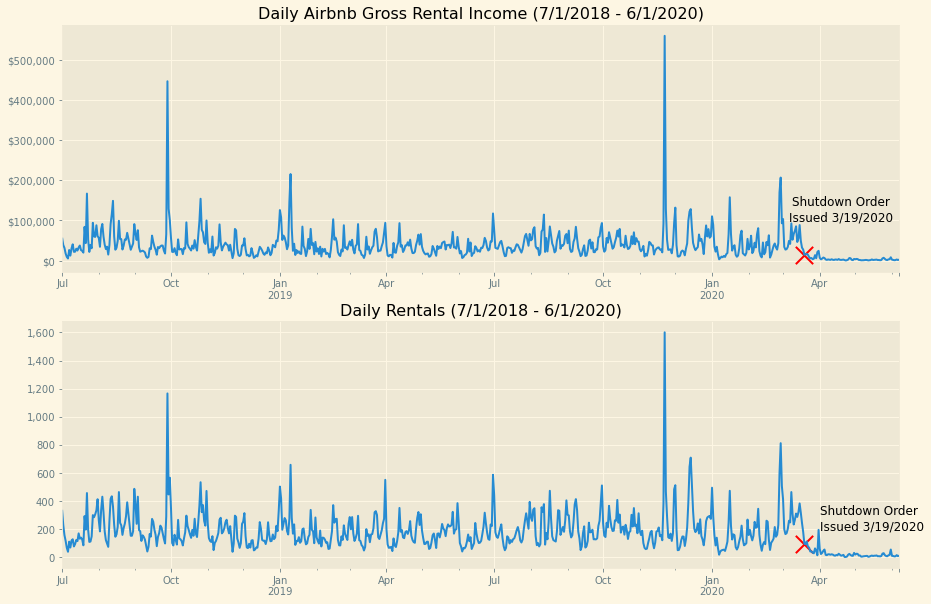

In [6]:
#Create fig
f, ax = plt.subplots(2,1,figsize = (15,10))

#Plot total revenue each day
daily_gross.plot(ax=ax[0])
ax[0].scatter('2020-03-19', 14443, color = 'red',  marker='x',s=300,  edgecolors='black',
)

#Set plot aesthetics
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax[0].set_xlabel('')
ax[0].set_title('Daily Airbnb Gross Rental Income (7/1/2018 - 6/1/2020)')
ax[0].text('2020-04-19', 100_000, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='center',);


#Plot total revenue each day
daily_rentals.plot(ax=ax[1])

#Add text for Shut down
X='2020-03-19'
Y = daily_rentals.iloc[daily_rentals.index == '2020-03-19']
ax[1].scatter(X,Y, color = 'red',  marker='x',s=300,  edgecolors='black')

#Set plot aesthetics
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].set_xlabel('')
ax[1].set_title('Daily Rentals (7/1/2018 - 6/1/2020)')

ax[1].text('2020-04-01' ,Y + 100, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='left',);

#Stay at home order March 19 2020

# Decomposition

In [7]:
#Read in seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

#Fit seasonal_decompose to original and zoomed daily_gross
results = seasonal_decompose(daily_gross, )

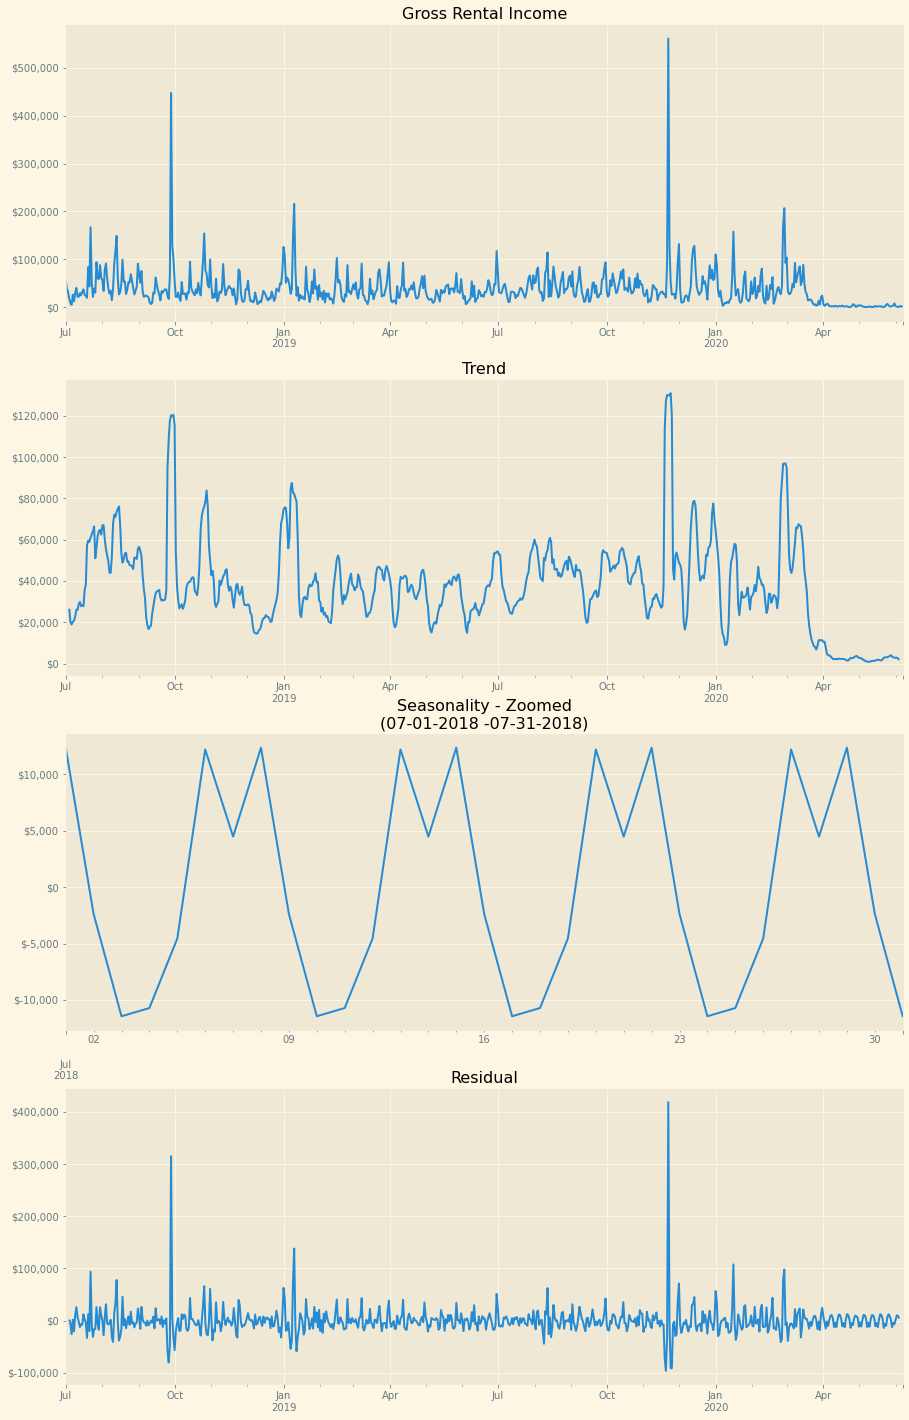

In [8]:
#Create figure to plot time series components
f, axes = plt.subplots(4,1, figsize= (15,25))

#Plot data
daily_gross.plot(ax=axes[0], title = 'Gross Rental Income') #original time series
results.trend.plot(ax=axes[1], title = 'Trend') #trend
results.seasonal.plot(ax=axes[2], title = 'Seasonality - Zoomed\n(07-01-2018 -07-31-2018)', xlim = ['07-01-2018','07-31-2018']) #trend
results.resid.plot(ax=axes[3], title = 'Residual')

#Set plot aesthtics
for ax in axes:
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
    ax.set_xlabel('')

### Stationarize Data

In [9]:
#Append Stationary and trend values to daily gross
daily_gross = daily_gross.reset_index()
daily_gross.columns = ['date','gross']
daily_gross.set_index('date',inplace = True)
daily_gross['seasonal'] = results.seasonal.values
daily_gross['trend'] = results.trend.values

#Drop missing values and make data stationary
daily_gross.dropna(inplace = True, axis = 0)
daily_gross['gross_stationary'] = daily_gross.gross  - daily_gross.seasonal - daily_gross.trend

**Check**

In [10]:
#Read in Augmented Dickey-Fuller and KPSS tests from local machine
from Time_Series_Tests import ADF_KPSS_test

#Test stationarity
ADF_KPSS_test(daily_gross['gross_stationary'])

ADF Statistic: -11.790504636524366
P-Value: 9.85245031885123e-22
Critical Values 1% : -3.44
Critical Values 5% : -2.8658
Critical Values 10% : -2.569
KPSS Statistic: 0.02172146177467699
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739



C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Text(0.5, 0, '')

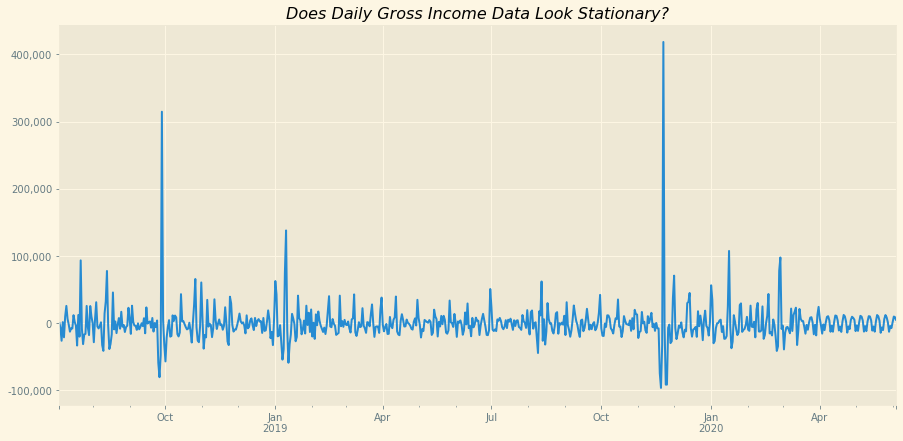

In [11]:
#Plot Stationary data for eye test
g = daily_gross.gross_stationary.plot(figsize = (15,7))

#Set plot aesthetics
g.set_title('Does Daily Gross Income Data Look Stationary?',fontstyle = 'italic')
g.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
g.set_xlabel('')

# Modeling Airbnb Daily Gross Income

**Prepare data**

Lock down bagan on 3/19/2020 and with our current data has been in effect for a total of 77 days. We will use the month of May and onwards as our test set before creating a forecast for the rest of Q2 and forecasting Q3 (should similar lock down conditions hold). This might be a worst case scenario type of model

In [12]:
#Data starts at 7/4/2018(Q3) and ends 6/4/2020(Q2 ends 6/30) 702 days of data total
#Q3 is 7/1/2020 - 9/30/2020
# each quarter is  91.25 days

## Build base model - Daily Persistence forecast

In [13]:

#3/19 - 6/4 (77 days)
#we can try to forecast May 1 to June 6 and then extrapolate out throuh the end of Q3

**Prepare Data**

In [14]:
daily_gross.head()

,gross,seasonal,trend,gross_stationary
date,,,,
2018-07-04,17696.0,-10717.892657,26532.428571,1881.464086
2018-07-05,9044.0,-4546.420238,20125.285714,-6534.865476
2018-07-06,5135.0,12215.809436,18935.285714,-26016.095151
2018-07-07,26393.0,4488.673722,20208.000000,1696.326278
2018-07-08,12278.0,12378.706579,20779.428571,-20880.135151


In [15]:
#Split data on May 1st 2020
cutoff = daily_gross.index.get_loc('05-01-2020') #Was 3/19/20

#Create train and test data
X_train = daily_gross.iloc[:cutoff,-1].values
X_test = daily_gross.iloc[cutoff:,-1].values

#Check
print('Training Data shape:',X_train.shape)
print('Test Data shape:',X_test.shape)


Training Data shape: (667,)
Test Data shape: (35,)


In [16]:
X_train[-5:]

array([-8666.84943625,  4878.49056375,  9678.24342089,  8071.60694282,
        5161.27738129])

**Build Persistence model**

In [17]:
persistence_model = pd.DataFrame(daily_gross.gross.iloc[cutoff:].values, columns=['actual'], index = daily_gross.gross.iloc[cutoff:].index)
persistence_model['predictions'] = persistence_model.actual.shift(periods = 1)

#Fill na with last training value
persistence_model.fillna(X_train[-1],inplace = True)

**Evaluate Predictions**

In [18]:
#Read in regression metrics
from Model_Evaluation import regression_metrics

#Evaluate persistence model predictions and store results in persistence_results
persistence_results = regression_metrics('Persistence Model', persistence_model.predictions.values,
                                        persistence_model.actual.values)

Persistence Model Evaluation Metrics:
R2: -0.05064719035724452
MAE: 1176.065068036833 
MAPE: 59.046382353989856
MSE: 3215487.2569972463
RMSE: 1793.1779769440752


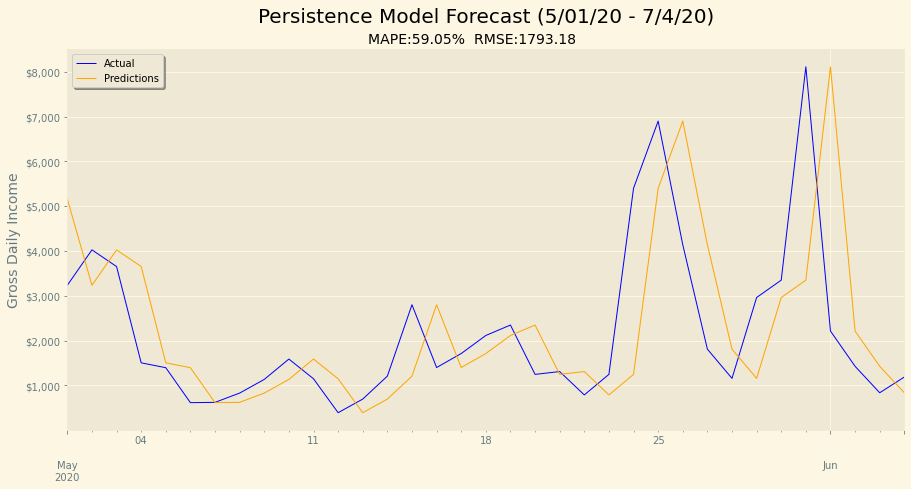

In [19]:
#Create plot
f, ax = plt.subplots( figsize = (15,7))

#Plot raw predictions
persistence_model.plot(color = ['blue','orange'], linewidth = 1, ax = ax)

###Set plot aesthetics
ax.set_title('Persistence Model Forecast (5/01/20 - 7/4/20)\n', fontsize = 20)
plt.suptitle('MAPE:{}%  RMSE:{}'.format(round(persistence_results['mape'],2),
                                      round(persistence_results['rmse'],2)),fontsize=14, y = .915)

ax.set_xlabel('')
ax.set_ylabel('Gross Daily Income', fontsize = 14)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax.legend(['Actual', 'Predictions'], shadow = True, frameon = True)

#Save figure
plt.savefig(eda_path + '/Persistence_Model_Forecast.png')

## Deep Learning LSTM

**Prepare data**

In [20]:
#Import libraries
from sklearn.preprocessing import MinMaxScaler

#Scale training data
scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(X_train.reshape(-1,1))

#Check
display(X_train_transformed[0:10])

array([[0.19049847],
       [0.17414977],
       [0.13630754],
       [0.19013884],
       [0.14628413],
       [0.20645141],
       [0.23702056],
       [0.19941924],
       [0.18272506],
       [0.16253569]])

In [21]:
#Create training data and target
training_data = []
target = []

#Create training and test data with a 30 timestep
for i in np.arange(30,len(X_train_transformed)):
    training_data.append(X_train_transformed[i - 30: i])
    target.append(X_train_transformed[i])
    
#Convert to arrays
training_data = np.array(training_data)
target = np.array(target)

#Check
print('Training data shape:', training_data.shape)
print('Test data shape:', target.shape)

Training data shape: (637, 30, 1)
Test data shape: (637, 1)


**Build Base LSTM Network**

In [22]:
#Import libraries
import tensorflow as tf
from tensorflow import keras

In [23]:
#Clear backend
tf.keras.backend.clear_session()

#Init base model
base_model = tf.keras.Sequential()

#Add layers
base_model.add(tf.keras.layers.LSTM(units = 32,input_shape = (training_data.shape[1],1), return_sequences = True))
base_model.add(tf.keras.layers.Dropout(.2))

base_model.add(tf.keras.layers.LSTM(units = 32, return_sequences = False))
base_model.add(tf.keras.layers.Dropout(.2))

base_model.add(tf.keras.layers.Dense(1))

#Compile
base_model.compile(optimizer = 'adam', loss = 'MeanSquaredError')

**Train**

In [24]:
base_history = base_model.fit(training_data, target, epochs=50, batch_size = 30)

Epoch 1/50
22/22 [==============================] - 1s 24ms/step - loss: 0.0093
Epoch 2/50
22/22 [==============================] - 0s 21ms/step - loss: 0.0042
Epoch 3/50
22/22 [==============================] - 0s 20ms/step - loss: 0.0038
Epoch 4/50
22/22 [==============================] - 0s 20ms/step - loss: 0.0039
Epoch 5/50
22/22 [==============================] - 0s 20ms/step - loss: 0.0037
Epoch 6/50
22/22 [==============================] - 0s 20ms/step - loss: 0.0039
Epoch 7/50
22/22 [==============================] - 0s 20ms/step - loss: 0.0037
Epoch 8/50
22/22 [==============================] - 0s 19ms/step - loss: 0.0036
Epoch 9/50
22/22 [==============================] - 0s 19ms/step - loss: 0.0037
Epoch 10/50
22/22 [==============================] - 0s 19ms/step - loss: 0.0038
Epoch 11/50
22/22 [==============================] - 0s 19ms/step - loss: 0.0037
Epoch 12/50
22/22 [==============================] - 0s 19ms/step - loss: 0.0037
Epoch 13/50
22/22 [==================

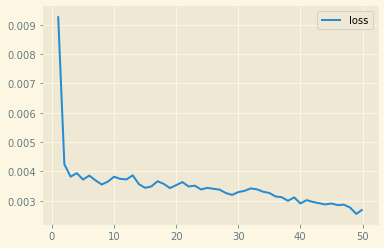

In [25]:
#Store base_history as a dataframe
base_loss = pd.DataFrame(base_history.history, columns=['loss'], index = np.arange(0,50) + 1)

base_loss.plot()

**Prepare test data**

In [26]:
cutoff

667

In [27]:
#Get test data and be sure to add last 30 of training data
data = daily_gross['gross_stationary'][cutoff - 30: ].values

#Scale data
inputs = scaler.transform(data.reshape(-1,1))

#Check
print('Transformed inputs:\n',inputs[:10])

Transformed inputs:
 [[0.20072543]
 [0.18094046]
 [0.1569918 ]
 [0.18360983]
 [0.16701473]
 [0.18907494]
 [0.20532983]
 [0.20736239]
 [0.19534158]
 [0.16229426]]


In [28]:
#Prepare test data and target
test_data = []
test_target = []

for i in np.arange(30, len(inputs)):
    test_data.append(inputs[i-30:i])
    test_target.append(inputs[i])

#Convert lists to arrays
test_data = np.array(test_data)
test_target = np.array(test_target)

#Check
print('Training data shape:', test_data.shape)
print('Target shape:', test_target.shape)

Training data shape: (35, 30, 1)
Target shape: (35, 1)


**Predictions**

In [29]:
#Make predictions
predictions = base_model.predict(test_data)
predictions = scaler.inverse_transform(predictions)
predictions.shape

(35, 1)

LSTM Prediction Evaluations

In [30]:
daily_gross.iloc[cutoff:, :].head()

,gross,seasonal,trend,gross_stationary
date,,,,
2020-05-01,3236.0,12215.809436,2735.428571,-11715.238008
2020-05-02,4026.0,4488.673722,2690.285714,-3152.959436
2020-05-03,3654.0,12378.706579,2625.857143,-11350.563722
2020-05-04,1506.0,-2372.061992,2151.428571,1726.633421
2020-05-05,1397.0,-11446.814849,1807.857143,11035.957707


In [31]:
daily_gross.iloc[cutoff:, 1].head() #seasonal

date
2020-05-01    12215.809436
2020-05-02     4488.673722
2020-05-03    12378.706579
2020-05-04    -2372.061992
2020-05-05   -11446.814849
Name: seasonal, dtype: float64

In [32]:
daily_gross.iloc[cutoff:, 2].head() #trend

date
2020-05-01    2735.428571
2020-05-02    2690.285714
2020-05-03    2625.857143
2020-05-04    2151.428571
2020-05-05    1807.857143
Name: trend, dtype: float64

In [33]:
#Store predictions in dataframe
lstm_results = pd.DataFrame(predictions, columns = ['original_predictions'], index=daily_gross.iloc[cutoff:].index )
lstm_results['actual'] = daily_gross.iloc[cutoff:,0].values

lstm_results['predictions_adjusted'] = lstm_results['original_predictions'] + daily_gross.iloc[cutoff:, 1].values + daily_gross.iloc[cutoff:, 2].values

lstm_results.head()

,original_predictions,actual,predictions_adjusted
date,,,
2020-05-01,-6313.324707,3236.0,8637.913301
2020-05-02,-5715.965820,4026.0,1462.993616
2020-05-03,-4467.196777,3654.0,10537.366945
2020-05-04,-1389.866211,1506.0,-1610.499632
2020-05-05,484.599152,1397.0,-9154.358555


In [34]:
results = regression_metrics('LSTM Base', lstm_results.predictions_adjusted.values, lstm_results.actual.values)

LSTM Base Evaluation Metrics:
R2: -16.12189386266924
MAE: 6493.267256311893 
MAPE: 530.0293041153905
MSE: 52401255.18477067
RMSE: 7238.871126409882


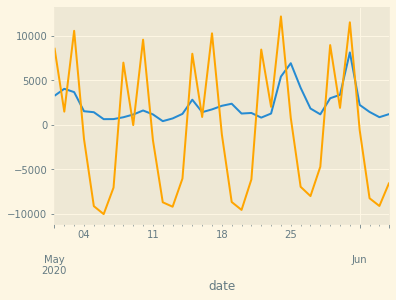

In [35]:
lstm_results.actual.plot()

lstm_results.predictions_adjusted.plot(color = 'orange')

V1 LSTM

more layers, neurons, added relu to final layer

increase epochs

In [39]:
#Clear backend
tf.keras.backend.clear_session()

#Init base model
v1_model = tf.keras.Sequential()

#Add layers
v1_model.add(tf.keras.layers.LSTM(units = 32,input_shape = (training_data.shape[1],1), return_sequences = True))
v1_model.add(tf.keras.layers.Dropout(.2))

v1_model.add(tf.keras.layers.LSTM(units = 64, return_sequences = True))
v1_model.add(tf.keras.layers.Dropout(.2))

v1_model.add(tf.keras.layers.LSTM(units = 64, return_sequences = True))
v1_model.add(tf.keras.layers.Dropout(.2))

v1_model.add(tf.keras.layers.LSTM(units = 64, return_sequences = True))
v1_model.add(tf.keras.layers.Dropout(.2))

v1_model.add(tf.keras.layers.LSTM(units = 32, return_sequences = False))
v1_model.add(tf.keras.layers.Dropout(.2))

v1_model.add(tf.keras.layers.Dense(1, activation = 'relu'))

#Compile
v1_model.compile(optimizer = 'adam', loss = 'MeanSquaredError')

In [40]:
training_data.shape

(637, 30, 1)

In [ ]:
v1_history = v1_model.fit(training_data, target, epochs=100, batch_size = 30)

Epoch 1/100
22/22 [==============================] - 1s 62ms/step - loss: 0.0075
Epoch 2/100
22/22 [==============================] - 1s 57ms/step - loss: 0.0039
Epoch 3/100
22/22 [==============================] - 1s 56ms/step - loss: 0.0039
Epoch 4/100
22/22 [==============================] - 1s 55ms/step - loss: 0.0038
Epoch 5/100
22/22 [==============================] - 1s 55ms/step - loss: 0.0039
Epoch 6/100
22/22 [==============================] - 1s 53ms/step - loss: 0.0040
Epoch 7/100
22/22 [==============================] - 1s 53ms/step - loss: 0.0037
Epoch 8/100
22/22 [==============================] - 1s 53ms/step - loss: 0.0038
Epoch 9/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0036
Epoch 10/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0039
Epoch 11/100
22/22 [==============================] - 1s 53ms/step - loss: 0.0037
Epoch 12/100
22/22 [==============================] - 1s 54ms/step - loss: 0.0036
Epoch 13/100
22/22 [=====

In [ ]:
#Make predictions
predictions = v1_model.predict(test_data)
predictions = scaler.inverse_transform(predictions)
predictions.shape

In [ ]:
#Store predictions in dataframe
lstm_results = pd.DataFrame(predictions, columns = ['original_predictions'], index=daily_gross.iloc[cutoff:].index )
lstm_results['actual'] = daily_gross.iloc[cutoff:,0].values

lstm_results['predictions_adjusted'] = lstm_results['original_predictions'] + daily_gross.iloc[cutoff:, 1].values + daily_gross.iloc[cutoff:, 2].values

lstm_results.head()

In [ ]:
results = regression_metrics('LSTM Base', lstm_results.predictions_adjusted.values, lstm_results.actual.values)

In [ ]:
lstm_results.actual.plot()

lstm_results.predictions_adjusted.plot(color = 'orange')

- How does the long term rental market compare to the of the tourist industry?
    - Which is more profitable? Is there evidence to suggest Airbnb should consider entering the rental housing market
    - Who are our most profitable hosts? Are people using Airbnb as a business or 

### Exploring Airbnb Ownership

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**
- Which of these owners are renting out the entire home/apartment properties?
- What kinds of properties are these and how do they compare to other hosts
- Are these hosts also Super Hosts?

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**

In [ ]:
#Create dataframe that contains id, name, # of listings, #of properties,  gross income, and super host flag for each renter
host_metrics = pd.DataFrame(df.groupby(['host_id','host_name'])['id'].agg(total_listings = 'count'))
host_metrics['properties'] = df.groupby(['host_id','host_name'])['id'].nunique().values#,'unique_listings':pd.Series.nunique})
host_metrics['gross_income'] = df.groupby(['host_id','host_name'])['price'].sum().values
host_metrics['superhost?'] = df.groupby(['host_id','host_name'])['host_is_superhost'].sum().values
host_metrics['superhost?'] = host_metrics['superhost?'].apply(lambda x: False if x == 0 else True)
host_metrics['avg_monthly_bookings'] = host_metrics['total_listings']/24

#Tidy cols
host_metrics.sort_values(by = 'properties',ascending = False,inplace = True)
host_metrics = host_metrics.reindex(sorted(host_metrics.columns), axis=1)

#Check
display(host_metrics.head(10))

**Who are these hosts?**

7 of the top 10 property holders on Airbnb in SF are hotels or fully-furnished rental comanies(for short and long-term rent). These incluse:
- Zeus(furnished home living)
- Sonder(furnished rental)
- Landmark(hotel)
- Stratford(hotel)
- The Bartlett(hotel)
- Blueground(fully furnished apartments)

**What kinds of properties do the top hosts have?**


**What do we know about these hosts?**

** What kinds of properties do the top of the top have and how many?**

**What % of the total revenue are these people responsible for?**

- What kinds of properties are these and how do they compare to other hosts

**Check price distribution w/ and w/o outliers